#Ammaar Khan

## Research question/interests

My research interest is: whether 'home team advantage' is reflected in the dataset and if so, how much does it factor into the outcome of the match (by number of goals)?

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

raw_data = pd.read_csv("../data/raw/WorldCupMatches.csv")
raw_data

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Milestone 3

### Task 1: EDA

Understanding my dataset:

As shown above in the raw dataset theres a lot of rows with Nan values that have been read into the dataframe for some reason. I will change that right at the start for a better analysis. 

In [ ]:
raw_data = raw_data.dropna()

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  850 non-null    float64
 1   Datetime              850 non-null    object 
 2   Stage                 850 non-null    object 
 3   Stadium               850 non-null    object 
 4   City                  850 non-null    object 
 5   Home Team Name        850 non-null    object 
 6   Home Team Goals       850 non-null    float64
 7   Away Team Goals       850 non-null    float64
 8   Away Team Name        850 non-null    object 
 9   Win conditions        850 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  850 non-null    float64
 12  Half-time Away Goals  850 non-null    float64
 13  Referee               850 non-null    object 
 14  Assistant 1           850 non-null    object 
 15  Assistant 2           8

In [ ]:
raw_data.shape

(850, 20)

In [ ]:
raw_data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [ ]:
raw_data.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [ ]:
raw_data.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,8.500000e+02,8.500000e+02
mean,1985.021176,1.810588,1.022353,45164.800000,0.710588,0.429412,1.068626e+07,6.078489e+07
std,22.431301,1.612125,1.088853,23485.249247,0.937885,0.691752,2.732359e+07,1.105805e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188250e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.184000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [ ]:
raw_data.nunique()

Year                     20
Datetime                601
Stage                    23
Stadium                 181
City                    151
Home Team Name           78
Home Team Goals          11
Away Team Goals           7
Away Team Name           83
Win conditions           43
Attendance              622
Half-time Home Goals      7
Half-time Away Goals      6
Referee                 366
Assistant 1             387
Assistant 2             408
RoundID                 101
MatchID                 835
Home Team Initials       77
Away Team Initials       82
dtype: int64

In [ ]:
# cleaning my data set: removing the columns I don't require for my analysis
clean_data = raw_data.drop(['Datetime','Stage', 'Stadium', 'City', 'Win conditions', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'], axis=1)
clean_data

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name
0,1930.0,France,4.0,1.0,Mexico
1,1930.0,USA,3.0,0.0,Belgium
2,1930.0,Yugoslavia,2.0,1.0,Brazil
3,1930.0,Romania,3.0,1.0,Peru
4,1930.0,Argentina,1.0,0.0,France
...,...,...,...,...,...
847,2014.0,Netherlands,0.0,0.0,Costa Rica
848,2014.0,Brazil,1.0,7.0,Germany
849,2014.0,Netherlands,0.0,0.0,Argentina
850,2014.0,Brazil,0.0,3.0,Netherlands


In [ ]:
home_teams = clean_data['Home Team Name'].unique()
print(np.sort(home_teams))

['Algeria' 'Angola' 'Argentina' 'Australia' 'Austria' 'Belgium' 'Bolivia'
 'Brazil' 'Bulgaria' 'Cameroon' 'Canada' 'Chile' 'China PR' 'Colombia'
 'Costa Rica' 'Croatia' 'Cuba' 'Czech Republic' 'Czechoslovakia'
 "C�te d'Ivoire" 'Denmark' 'Ecuador' 'England' 'France' 'German DR'
 'Germany' 'Germany FR' 'Ghana' 'Greece' 'Haiti' 'Honduras' 'Hungary'
 'IR Iran' 'Iran' 'Iraq' 'Italy' 'Jamaica' 'Japan' 'Korea DPR'
 'Korea Republic' 'Mexico' 'Morocco' 'Netherlands' 'New Zealand' 'Nigeria'
 'Northern Ireland' 'Norway' 'Paraguay' 'Peru' 'Poland' 'Portugal'
 'Romania' 'Russia' 'Saudi Arabia' 'Scotland' 'Senegal' 'Serbia'
 'Slovakia' 'Slovenia' 'South Africa' 'Soviet Union' 'Spain' 'Sweden'
 'Switzerland' 'Togo' 'Tunisia' 'Turkey' 'USA' 'Ukraine' 'Uruguay' 'Wales'
 'Yugoslavia' 'Zaire' 'rn">Bosnia and Herzegovina'
 'rn">Republic of Ireland' 'rn">Serbia and Montenegro'
 'rn">Trinidad and Tobago' 'rn">United Arab Emirates']


In [ ]:
away_teams = clean_data['Away Team Name'].unique()
print(np.sort(away_teams))

['Algeria' 'Angola' 'Argentina' 'Australia' 'Austria' 'Belgium' 'Bolivia'
 'Brazil' 'Bulgaria' 'Cameroon' 'Canada' 'Chile' 'China PR' 'Colombia'
 'Costa Rica' 'Croatia' 'Cuba' 'Czech Republic' 'Czechoslovakia'
 "C�te d'Ivoire" 'Denmark' 'Dutch East Indies' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'France' 'German DR' 'Germany' 'Germany FR'
 'Ghana' 'Greece' 'Haiti' 'Honduras' 'Hungary' 'IR Iran' 'Iran' 'Iraq'
 'Israel' 'Italy' 'Jamaica' 'Japan' 'Korea DPR' 'Korea Republic' 'Kuwait'
 'Mexico' 'Morocco' 'Netherlands' 'New Zealand' 'Nigeria'
 'Northern Ireland' 'Norway' 'Paraguay' 'Peru' 'Poland' 'Portugal'
 'Romania' 'Russia' 'Saudi Arabia' 'Scotland' 'Senegal' 'Serbia'
 'Slovakia' 'Slovenia' 'South Africa' 'Soviet Union' 'Spain' 'Sweden'
 'Switzerland' 'Togo' 'Tunisia' 'Turkey' 'USA' 'Ukraine' 'Uruguay' 'Wales'
 'Yugoslavia' 'Zaire' 'rn">Bosnia and Herzegovina'
 'rn">Republic of Ireland' 'rn">Serbia and Montenegro'
 'rn">Trinidad and Tobago' 'rn">United Arab Emirates']


<AxesSubplot:>

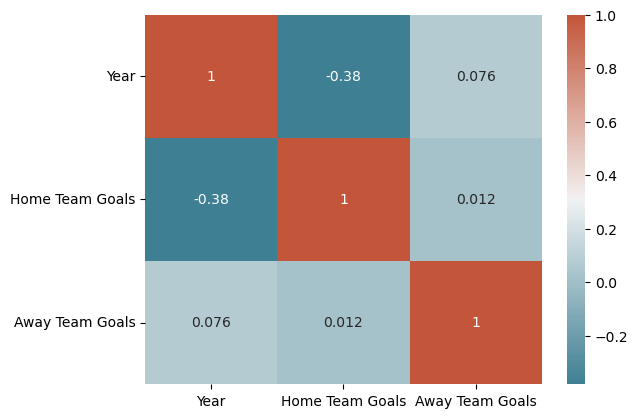

In [ ]:
# calculate correlation matrix
corr = clean_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

From this graph, we don't really get a lot of information but we notice that there is a negative relation between years and home team goals. This means as years have gone by, the home team goals have reduced. This is not exactly relevant to my analysis but is interesting. I will plot a scatterplot to explore this. 

<AxesSubplot:xlabel='Year', ylabel='Home Team Goals'>

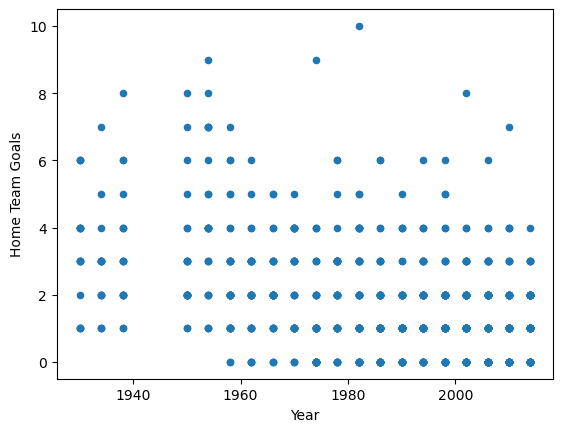

In [ ]:
clean_data.plot(kind='scatter', x='Year', y='Home Team Goals')

A scatterplot is not a good graph to represent this as it doesn't show the frequency. Lets look at a histogram for frequency. 

<AxesSubplot:title={'center':'Histogram'}, ylabel='Frequency'>

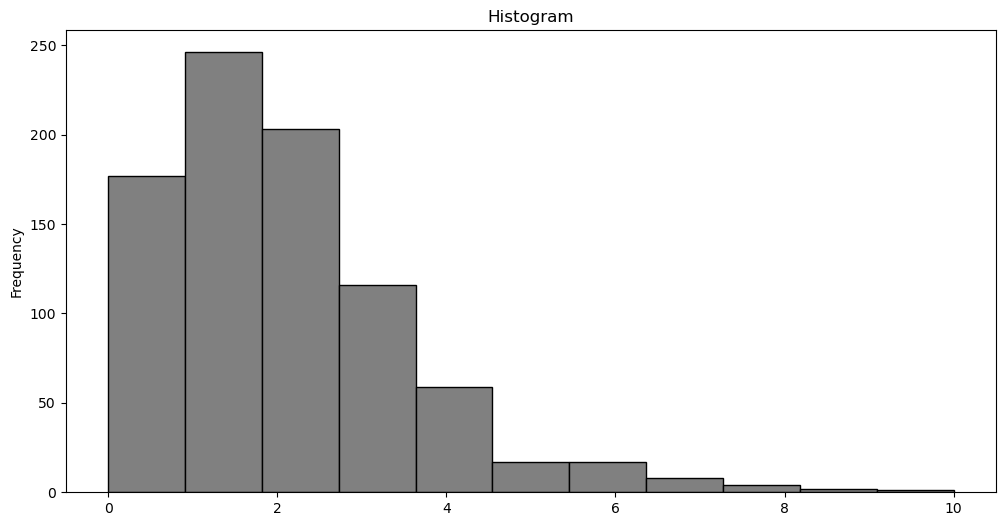

In [ ]:
clean_data['Home Team Goals'].plot(kind='hist', bins=11, figsize=(12,6), facecolor='grey',edgecolor='black', title='Histogram')

<AxesSubplot:title={'center':'Goals Scored by Home Team'}, xlabel='Home Team Goals'>

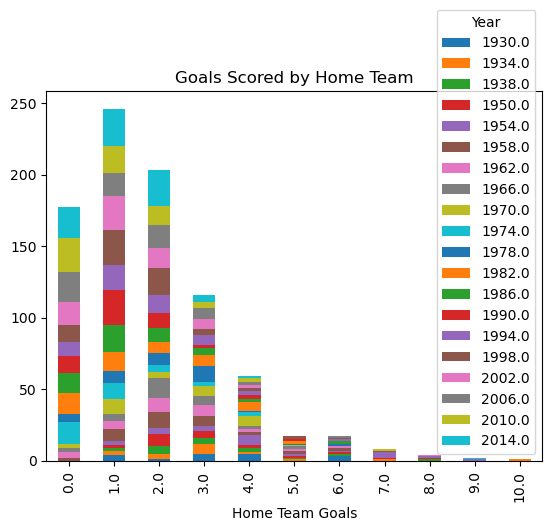

In [ ]:
clean_data.groupby(['Home Team Goals', 'Year']).size().unstack().plot(kind='bar', stacked=True, title='Goals Scored by Home Team')

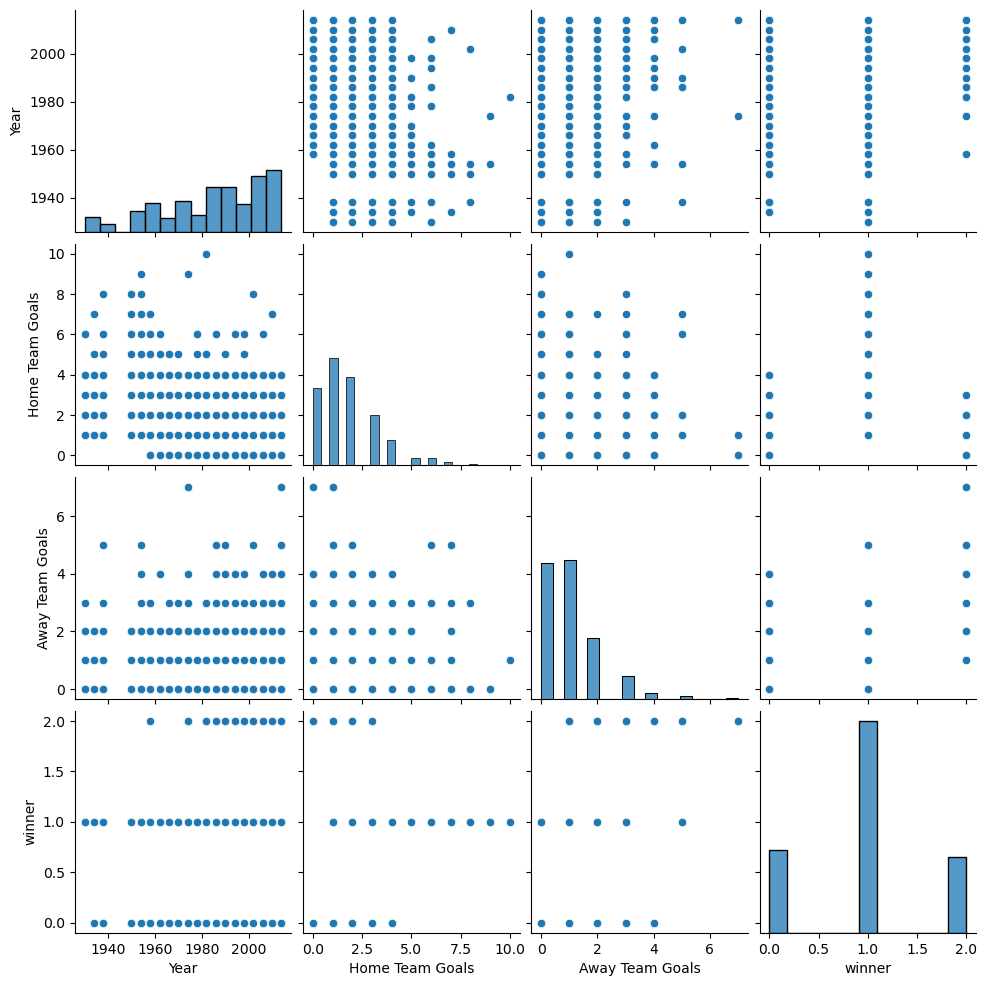

In [22]:
sns.pairplot(clean_data)


## Task 2: Data Analysis Pipeline

I will be collecting a lot of my previous steps to one place for clarity and understanding.

In [ ]:
# 1. Load Data
raw_data = pd.read_csv("../data/raw/WorldCupMatches.csv")
raw_data = raw_data.dropna()
# 2. Clean Data
clean_data = raw_data.drop(['Datetime','Stage', 'Stadium', 'City', 'Win conditions', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'], axis=1)
clean_data.reset_index()
print(clean_data.shape)
print(clean_data.head())
print(clean_data.tail())

(850, 5)
     Year Home Team Name  Home Team Goals  Away Team Goals Away Team Name
0  1930.0         France              4.0              1.0         Mexico
1  1930.0            USA              3.0              0.0        Belgium
2  1930.0     Yugoslavia              2.0              1.0         Brazil
3  1930.0        Romania              3.0              1.0           Peru
4  1930.0      Argentina              1.0              0.0         France
       Year Home Team Name  Home Team Goals  Away Team Goals Away Team Name
847  2014.0    Netherlands              0.0              0.0     Costa Rica
848  2014.0         Brazil              1.0              7.0        Germany
849  2014.0    Netherlands              0.0              0.0      Argentina
850  2014.0         Brazil              0.0              3.0    Netherlands
851  2014.0        Germany              1.0              0.0      Argentina


In [6]:
# 3. Process Data
def label_winner (row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        return 1
    if row['Home Team Goals'] < row['Away Team Goals']:
        return 2
    return 0

clean_data['winner'] = clean_data.apply (lambda row: label_winner(row), axis=1)
clean_data

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,winner
0,1930.0,France,4.0,1.0,Mexico,1
1,1930.0,USA,3.0,0.0,Belgium,1
2,1930.0,Yugoslavia,2.0,1.0,Brazil,1
3,1930.0,Romania,3.0,1.0,Peru,1
4,1930.0,Argentina,1.0,0.0,France,1
...,...,...,...,...,...,...
847,2014.0,Netherlands,0.0,0.0,Costa Rica,0
848,2014.0,Brazil,1.0,7.0,Germany,2
849,2014.0,Netherlands,0.0,0.0,Argentina,0
850,2014.0,Brazil,0.0,3.0,Netherlands,2



## Task 3: Method Chaining

I will be cleaning up task 2 further and transfer it to a python file once finalized. 

In [25]:
# method chaining imports
import pandas as pd

def load_and_process(filePath):
   
    # Method Chain 1 (Load data, drop na rows, drop unneeded columns)
    
    # Preparing list needed
    unneededCols = ['Datetime','Stage', 'Stadium', 'City', 'Win conditions', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials']
    
    df1 = (
        pd.read_csv("../data/raw/WorldCupMatches.csv")
        .dropna()
        .drop(unneededCols, axis=1)
        .reset_index(drop=True)
    )
    
    # Method Chain 2 (adding column with values for winner) 
    
    # Preparing function needed
    def label_winner (row):
        if row['Home Team Goals'] > row['Away Team Goals']:
            return 1
        if row['Home Team Goals'] < row['Away Team Goals']:
            return 2
        return 0
    
    df1['Winner'] = (
        df1
        .apply (lambda row: label_winner(row), axis=1)
    )
        
    
    return df1

Testing my method to make sure it works and outputs as I intended.

In [27]:
clean = load_and_process("../data/raw/WorldCupMatches.csv")
clean

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Winner
0,1930.0,France,4.0,1.0,Mexico,1
1,1930.0,USA,3.0,0.0,Belgium,1
2,1930.0,Yugoslavia,2.0,1.0,Brazil,1
3,1930.0,Romania,3.0,1.0,Peru,1
4,1930.0,Argentina,1.0,0.0,France,1
...,...,...,...,...,...,...
845,2014.0,Netherlands,0.0,0.0,Costa Rica,0
846,2014.0,Brazil,1.0,7.0,Germany,2
847,2014.0,Netherlands,0.0,0.0,Argentina,0
848,2014.0,Brazil,0.0,3.0,Netherlands,2


This works! Very happy with this. I'll transfer the method and imports to my functions python file and test again.

In [20]:
import project_functions1 as p1

In [28]:
test = p1.load_and_process("../data/raw/WorldCupMatches.csv")
test

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Winner
0,1930.0,France,4.0,1.0,Mexico,1
1,1930.0,USA,3.0,0.0,Belgium,1
2,1930.0,Yugoslavia,2.0,1.0,Brazil,1
3,1930.0,Romania,3.0,1.0,Peru,1
4,1930.0,Argentina,1.0,0.0,France,1
...,...,...,...,...,...,...
845,2014.0,Netherlands,0.0,0.0,Costa Rica,0
846,2014.0,Brazil,1.0,7.0,Germany,2
847,2014.0,Netherlands,0.0,0.0,Argentina,0
848,2014.0,Brazil,0.0,3.0,Netherlands,2


Everything looks good. Onto task 4 now.

## Task 4: Data Analysis